# Notebook #5: Modelos

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_predicciones as sp

In [3]:
df = pd.read_csv("../../datos/modelo2/csv_estandarizado.csv", index_col=0)

In [4]:
df.head()

,price,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality,size_standard,distance_standard
0,750.0,1,1,1,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,705.633136,0.180254,-0.680228
1,750.0,1,2,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,735.546086,0.741674,0.018574
3,590.0,1,3,2,-3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,641.457386,0.741674,3.122134
4,684.0,1,0,1,-3.0,-1,0.0,0.0,0.0,0.0,0.0,1.0,705.633136,-0.661876,-0.402564
5,600.0,1,2,1,3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,646.457386,0.910100,1.623409


In [5]:
X = df.drop("price", axis = 1)
y = df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Random Forest

In [6]:
params_rf = {
    'n_estimators': [40, 50, 60], # de árboles que queremos en nuestro bosque
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 15, 20], # mínimo de datos que debe tener la madre
    'min_samples_leaf': [10, 15, 20], # mínimo de datos que debe tener el hijo
    'max_leaf_nodes': [70, 80, 100] # de nodos finales
}

In [7]:
modelo_final_rf, df_metricas_rf = sp.probar_modelo(X_train, y_train["price"].values, X_test, y_test, params_rf, RandomForestRegressor())

Los mejores parámetros para el modelo con RandomForestRegressor() son:
    {'max_depth': 20, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
    

    Y sus mejores métricas son:


,r2_score,MAE,MSE,RMSE
train,0.474560,29.969149,1693.758572,41.155298
test,0.430739,34.774934,2162.563500,46.503371


In [8]:
with open('../../modelos/rf_regressor.pkl', 'wb') as f:
    pickle.dump(modelo_final_rf, f)

In [9]:
df_importancia_rf = pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index=X.columns).sort_values(by="Importancia", ascending = False)
df_importancia_rf

,Importancia
municipality,0.663180
size_standard,0.153379
distance_standard,0.078774
floor,0.060352
rooms,0.025130
hasLift,0.007501
exterior,0.006807
propertyType_studio,0.002854
propertyType_flat,0.002023
bathrooms,0.000000


<Axes: xlabel='Importancia', ylabel='None'>

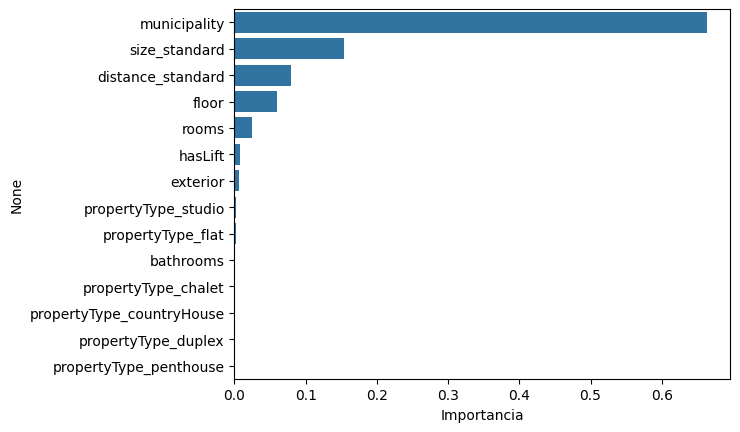

In [10]:
sns.barplot(x = "Importancia", y= df_importancia_rf.index, data = df_importancia_rf)

## Gradient Boosting

In [11]:
params_gb = {
    'n_estimators': [60, 65, 70],
    'max_depth': [4, 5, 6],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [4, 5, 6],
    'max_leaf_nodes': [40, 45, 50]
}

In [12]:
modelo_final_gb, df_metricas_gb = sp.probar_modelo(X_train, y_train["price"].values, X_test, y_test, params_gb, GradientBoostingRegressor())

Los mejores parámetros para el modelo con GradientBoostingRegressor() son:
    {'max_depth': 4, 'max_leaf_nodes': 45, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 65}
    

    Y sus mejores métricas son:


,r2_score,MAE,MSE,RMSE
train,0.785342,20.30766,691.951816,26.304977
test,0.362085,36.72184,2423.373039,49.227767


## Predicción

In [13]:
type()

TypeError: type() takes 1 or 3 arguments